<a href="https://colab.research.google.com/github/oyjuffer/DL-Final/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from keras.models import Sequential

from keras.layers import Activation, Convolution2D, Dropout, Conv2D, Rescaling
from keras.layers import AveragePooling2D, BatchNormalization
from keras.layers import GlobalAveragePooling2D
from keras.layers import Flatten
from keras.models import Model
from keras.layers import Input
from keras.layers import MaxPooling2D
from keras.layers import SeparableConv2D

random_seed = 40
keras.utils.set_random_seed(random_seed)

In [16]:
from google.colab import drive
drive.mount('/content/drive')

# dataset directory.
data_dir= "/content/drive/MyDrive/FER-2013/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data loading + training/validation dataset split

In [2]:
data_dir= "emotion-detection-fer/"

In [70]:
image_size = 48 # 48x48 gray scale images
batch_size = 32 # default batch size


train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir + "train/",
  image_size=(image_size, image_size),
  batch_size=batch_size,
  color_mode='grayscale')

train_ds, val_ds = tf.keras.utils.split_dataset(train_ds, left_size=0.8, seed=random_seed)

test_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir + "test/",
  image_size=(image_size, image_size),
  batch_size=batch_size,
  color_mode='grayscale')

Found 28709 files belonging to 7 classes.
Found 7178 files belonging to 7 classes.


### Analyze datasets

In [73]:
def print_ds_inf(ds, case=""):
    n_classes = 7 # 7 different expressions
    n_per_class = np.zeros(n_classes)
    
    for element in ds.as_numpy_iterator():
        labels = element[1]
        for lab in labels:
            n_per_class[lab] += 1
    n_total = np.sum(n_per_class)
    
    print(case+" -> Total: {}, Per_class: {}".format(n_total, n_per_class))
        
print_ds_inf(train_ds, "Train")
print_ds_inf(val_ds, "Validation")
print_ds_inf(test_ds, "Test")

Train -> Total: 22967.0, Per_class: [3170.  338. 3285. 5795. 3949. 3850. 2580.]
Validation -> Total: 5742.0, Per_class: [ 825.   98.  812. 1420. 1016.  980.  591.]
Test -> Total: 7178.0, Per_class: [ 958.  111. 1024. 1774. 1233. 1247.  831.]


In [30]:
class_names = val_ds.class_names
print(class_names)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


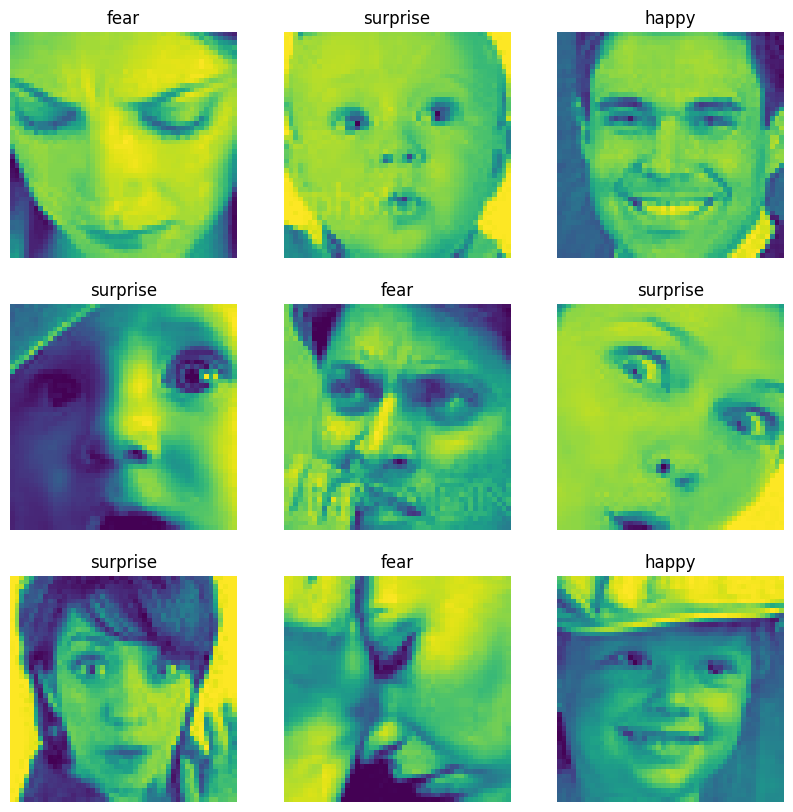

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in val_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# CNN arquitecture

In [6]:
num_classes = len(class_names)

model = Sequential()
model.add(Rescaling(1./255, input_shape=(image_size, image_size, 1))) # images are in the range [0 255]


model = Sequential([
  layers., 
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [34]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # labels are provided as integers
  metrics=['accuracy']) # computes the accuracy

In [8]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
479/479 [==============================] - 31s 64ms/step - loss: 1.7861 - accuracy: 0.2637 - val_loss: 1.7136 - val_accuracy: 0.3150
Epoch 2/10
479/479 [==============================] - 31s 64ms/step - loss: 1.6542 - accuracy: 0.3521 - val_loss: 1.6064 - val_accuracy: 0.3739
Epoch 3/10
479/479 [==============================] - 36s 75ms/step - loss: 1.5797 - accuracy: 0.3974 - val_loss: 1.5534 - val_accuracy: 0.4009
Epoch 4/10
479/479 [==============================] - 33s 69ms/step - loss: 1.5362 - accuracy: 0.4153 - val_loss: 1.5215 - val_accuracy: 0.4214
Epoch 5/10
479/479 [==============================] - 32s 66ms/step - loss: 1.4998 - accuracy: 0.4342 - val_loss: 1.4872 - val_accuracy: 0.4381
Epoch 6/10
479/479 [==============================] - 31s 65ms/step - loss: 1.4669 - accuracy: 0.4449 - val_loss: 1.4621 - val_accuracy: 0.4448
Epoch 7/10
479/479 [==============================] - 31s 65ms/step - loss: 1.4363 - accuracy: 0.4596 - val_loss: 1.4522 - val_accuracy:

## Learning curves

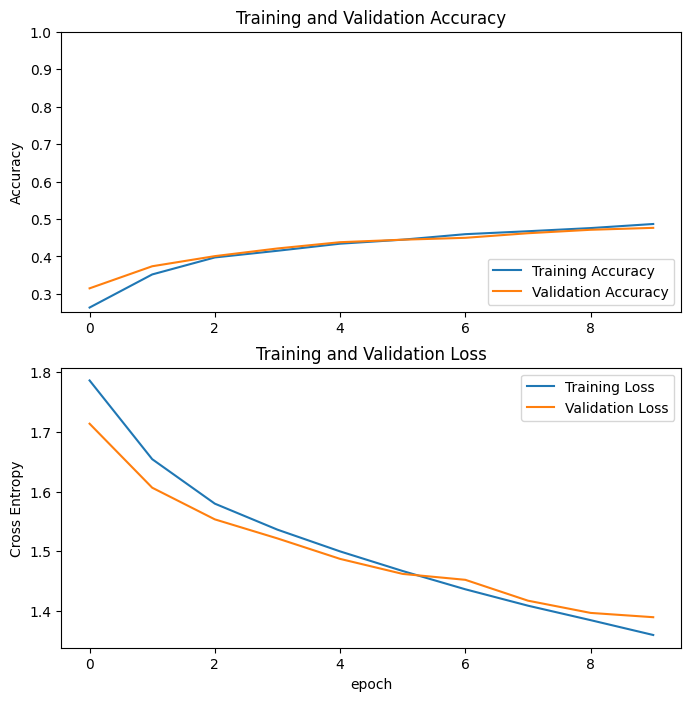

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()